# Topic Modeling

- This is the task for identifying topics among a set of scientific paper titles. We use Latent Dirichlet Allocation (LDA) to perform this task. The 
data papers.csv is located in the Google Drive. We first need to mount the Google Drive to allow us to access the file. Then we conduct some exploratory analysis. 

### 1. Loading the data

##### Method 1 - Google Colab
- Run the code block below if you're using Google colab for this demonstration and have uploaded the papers.csv file in your Google Drive
- Else, skip this part and move to the next cell block and run it in case you're using Jupyter 

In [2]:
import pandas as pd
papers = pd.read_csv('papers.csv')
papers.head()

,id,title
0,1,Self-Organization of Associative Database and ...
1,10,A Mean Field Theory of Layer IV of Visual Cort...
2,100,Storing Covariance by the Associative Long-Ter...
3,1000,Bayesian Query Construction for Neural Network...
4,1001,Neural Network Ensembles Cross Validation an...


### 2. Text cleaning

In [3]:
# Here we do one simple text cleaning: convert all titles into lowercases.
# We append a new column called 'processed_title'

papers['processed_title'] = papers['title'].map(lambda x:x.lower())

papers.head()

,id,title,processed_title
0,1,Self-Organization of Associative Database and ...,self-organization of associative database and ...
1,10,A Mean Field Theory of Layer IV of Visual Cort...,a mean field theory of layer iv of visual cort...
2,100,Storing Covariance by the Associative Long-Ter...,storing covariance by the associative long-ter...
3,1000,Bayesian Query Construction for Neural Network...,bayesian query construction for neural network...
4,1001,Neural Network Ensembles Cross Validation an...,neural network ensembles cross validation an...


### 3. Exploratory Data Analysis

#### We want to use WordCloud package to display top frequent words. The larger font indicates the higher frequency of that word in the corpus. The plot can be configured, including contour color, contour width, the background and so on. 

In [5]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 330.3 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 804.6 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.4 MB/s eta 0:00:00


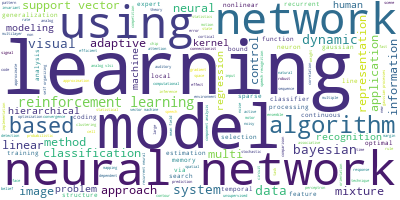

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['processed_title'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

### 4. Topic Modeling (LDA) Analysis
#### We plan to perform topic modeling (LDA) on the collection of documents. Here each document is the title of a scientific paper. 

#### 4.1 Import libraries

In [8]:
!pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 330.3 kB/s eta 0:01:13
   ---------------------------------------- 0.1/24.0 MB 1.2 MB/s eta 0:00:20
   ---------------------------------------- 0.3/24.0 MB 2.2 MB/s eta 0:00:11
    --------------------------------------- 0.5/24.0 MB 2.7 MB/s eta 0:00:09
   - -------------------------------------- 0.7/24.0 MB 3.0 MB/s eta 0:00:08
   - -------------------------------------- 0.9/24.0 MB 3.1 MB/s eta 0:00:08
   - -------------------------------------- 1.1/24.0 MB 3.6 MB/s eta 0:00:07
   -- ------------------------------------- 1.4/24.0 MB 3.7 MB/s eta 0:00:07
   -- ------------------------------------- 1.6/24.0 MB 4.0 MB/s eta 0:00:06
   --- ------------------------------------ 1.9/24.0 MB 4.2 MB/s eta 0:00:06
   --- ------------------------------------ 2.4/24.0 MB 4.6 MB/s eta 0:00:05
   ---- ----------------------------------- 2.6/24.0 MB 4.7 MB/s eta 0:00:05
   -

In [10]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\DELL
[nltk_data]     5590\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 4.2 Tokenization

In [11]:
# Convert a document/sentence into a list of lowercase tokens, ignoring tokens that are too short or too long.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations

#### 4.3 Stopwords removal

In [12]:
# remove english stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use']) # expand the stop word list by adding these customized words

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


In [13]:
# form a list where each element is a title
data = papers.processed_title.values.tolist()

# remove stop words and convert each title into a list of words
data_words = remove_stopwords(data)
print(data_words[0])
print(data_words[2])

['self', 'organization', 'associative', 'database', 'applications']
['storing', 'covariance', 'associative', 'long', 'term', 'potentiation', 'depression', 'synaptic', 'strengths', 'hippocampus']


###5. Term document freqency

In [14]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus: a collection of documents and each document is a list of words
texts = data_words

# Convert each document into a bag-of-words (BoW) format = a list of (token_id, token_count) tuples.
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[0])
print(texts[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]
['self', 'organization', 'associative', 'database', 'applications']


### 6. Training the model

In [15]:
from pprint import pprint
import numpy as np 

# number of topics
K = 10

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=K,alpha='asymmetric',eta=0.01)

### 7. Model Output

In [16]:
doc_lda = lda_model[corpus]

# iterate through documents/titles
for i in range(len(texts)):
  docbow = corpus[i] # get the document BoW
  doc_topics = lda_model.get_document_topics(docbow,minimum_probability=0.0) # Return topic distribution for the given document BoW, as a list of (topic_id, topic_probability) 2-tuples.
  doc_topic_prob = np.array([v[1] for v in doc_topics]) # convert it into a numpy array
  print('paper:',i+1,', dominant topic:',np.argmax(doc_topic_prob)+1) # choose the dominate topic (i.e., with the maximum topic probability among K topics)

paper: 1 , dominant topic: 2
paper: 2 , dominant topic: 3
paper: 3 , dominant topic: 1
paper: 4 , dominant topic: 3
paper: 5 , dominant topic: 1
paper: 6 , dominant topic: 3
paper: 7 , dominant topic: 1
paper: 8 , dominant topic: 2
paper: 9 , dominant topic: 2
paper: 10 , dominant topic: 2
paper: 11 , dominant topic: 1
paper: 12 , dominant topic: 10
paper: 13 , dominant topic: 1
paper: 14 , dominant topic: 4
paper: 15 , dominant topic: 3
paper: 16 , dominant topic: 1
paper: 17 , dominant topic: 5
paper: 18 , dominant topic: 2
paper: 19 , dominant topic: 1
paper: 20 , dominant topic: 1
paper: 21 , dominant topic: 1
paper: 22 , dominant topic: 1
paper: 23 , dominant topic: 2
paper: 24 , dominant topic: 2
paper: 25 , dominant topic: 1
paper: 26 , dominant topic: 8
paper: 27 , dominant topic: 8
paper: 28 , dominant topic: 3
paper: 29 , dominant topic: 3
paper: 30 , dominant topic: 10
paper: 31 , dominant topic: 9
paper: 32 , dominant topic: 8
paper: 33 , dominant topic: 1
paper: 34 , domin

### 8. Model Evaluation

In [17]:
# Calculate and return per-word likelihood bound, using a chunk of documents as evaluation corpus.
# Also output the calculated statistics, including the perplexity=2^(-bound), to log at INFO level.

perplexity_score = lda_model.log_perplexity(corpus)
print('Perplexity score: ', perplexity_score)

Perplexity score:  -8.678730630245825
